# Machine Learning
### Textbook is available at: [https://www.github.com/a-mhamdi/isetbz](https://www.github.com/a-mhamdi/isetbz)

---

Unsupervised learning is a type of machine learning in which the algorithm is not given any labeled training data. Instead, it must discover the patterns and relationships in the data on its own. Unsupervised learning is used for tasks such as clustering, dimensionality reduction, and anomaly detection.

In unsupervised learning, the algorithm is given a dataset and is asked to learn the underlying structure of the data. The goal is to find patterns or relationships in the data that can be used to group the data points into clusters or to reduce the dimensionality of the data.

Unsupervised learning is different from supervised learning, in which the algorithm is given labeled training data and is asked to learn a function that maps the input data to the corresponding output labels. In supervised learning, the goal is to make predictions about new data based on the patterns learned from the training data.

Some examples of unsupervised learning algorithms include:
1. $K$-means clustering;
1. Principal Component Analysis (PCA); and
1. Autoencoders. 
These algorithms can be used for tasks such as image compression, anomaly detection, and customer segmentation.

Unsupervised learning can be useful when there is no labeled training data available, or when the goal is to discover patterns or relationships in the data rather than to make predictions. However, it can be more difficult to evaluate the performance of unsupervised learning algorithms, as there is no ground truth to compare the predictions to.

### K-Means Clustering

$K$-means clustering is a method of unsupervised machine learning used to partition a dataset into $k$ clusters, where $k$ is a user-specified number. The goal of $K$-means clustering is to minimize the sum of squared distances between the points in each cluster and the centroid of the cluster.

In $K$-means clustering, the algorithm begins by selecting $k$ initial centroids randomly from the data points. Then, it assigns each data point to the cluster whose centroid is closest to it, based on the Euclidean distance between the data point and the centroid. Once all the data points have been assigned to a cluster, the algorithm calculates the new centroids of the clusters by taking the mean of all the data points in each cluster. The process is repeated until the centroids no longer change, or until a maximum number of iterations is reached.

**Importing the libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Show plots in an interactive format, e.g., zooming, saving, etc
%matplotlib notebook

In [3]:
plt.style.use("ggplot")

**Importing the dataset**

In [4]:
df = pd.read_csv("../Datasets/Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)": "Spending Score"}, inplace=True)

In [9]:
X = df.drop(columns=["CustomerID", "Age", "Gender"]).values
X[:10, :]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

Import `KMeans` class

In [10]:
from sklearn.cluster import KMeans

**OPTIONAL: IF NOT FAMILIAR WITH `KMEANS`, FEEL FREE TO SKIP THE FOLLOWING CELL**

---

**Using the elbow method to find the optimal number of clusters**

---

**Training the K-Means model on the dataset**

This code will create a $K$-means model with $5$ clusters and fit it to the data. It will then make predictions about which cluster each data point belongs to

In [11]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=123)
y_pred = kmeans.fit_predict(X)

In [12]:
centers = kmeans.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

**Visualizing the clusters**

<IPython.core.display.Javascript object>


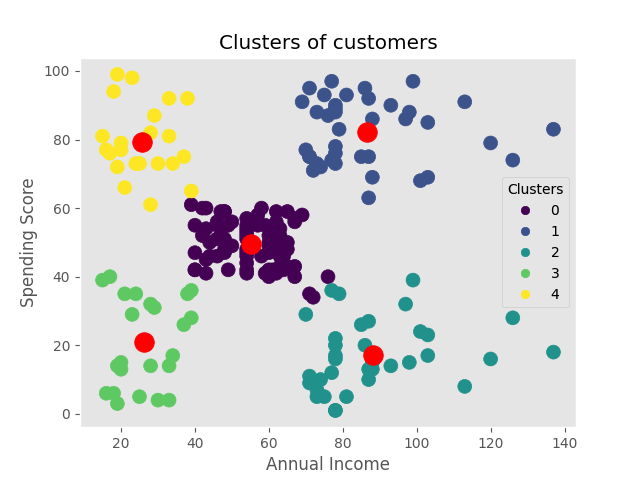

In [13]:
fig, ax = plt.subplots()
scatter =  ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=100)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
ax.scatter(centers[:, 0], centers[:, 1], c="red", s=200)
ax.set_title("Clusters of customers")
ax.set_xlabel("Annual Income")
ax.set_ylabel("Spending Score")
ax.grid()

$K$-means clustering is a fast and efficient method for clustering large datasets, and is often used as a baseline method for comparison with other clustering algorithms. However, it can be sensitive to the initial selection of centroids, and may not always find the optimal clusters if the data is not well-separated or has a non-convex shape. It is also limited to spherical clusters and may not work well for clusters with more complex shapes.